In [1]:
import serial
import time

In [65]:
serial_connection = serial.Serial('/dev/cu.usbmodem127633701', 9600, timeout=1)

In [66]:
print(serial_connection.readline().decode().strip())


READY


In [83]:
num_cycles = 50
cycle_duration = 200000
inpins = []
outpins = [6,10,10,6]
states = [1,1,0,0]
times = [10000,60000,90000,190000]

serial_connection.write(b'\x02')
serial_connection.write(f"{num_cycles}\n".encode())
serial_connection.write(f"{cycle_duration}\n".encode())
serial_connection.write((",".join(map(str, inpins)) + "\n").encode())
serial_connection.write((",".join(map(str, times)) + "\n").encode())
serial_connection.write((",".join(map(str, outpins)) + "\n").encode())
serial_connection.write((",".join(map(str, states)) + "\n").encode())
serial_connection.write(b'\x03')

1

In [82]:
serial_connection.write(b'I')

1

In [84]:
while True:
    print(serial_connection.readline().decode().strip())

READY
RECEIVED
STEP 0
10002
STEP 1
30002
STEP 2
60002
STEP 3
90002
STEP 4
120002
STEP 5
150002
CYCLE 0
STEP 0
10002
STEP 1
30002
STEP 2
60002
STEP 3
90002
STEP 4
120002
STEP 5
150002
CYCLE 1
STEP 0
10002
STEP 1
30002
STEP 2
60002
STEP 3
90002
STEP 4
120002
STEP 5
150002
CYCLE 2
STEP 0
10002
STEP 1
30002
STEP 2
60002
STEP 3
90002
STEP 4
120002
STEP 5
150002
CYCLE 3
STEP 0
10002
STEP 1
30002
STEP 2
60002
STEP 3
90002
STEP 4
120002
STEP 5
150002
CYCLE 4
STEP 0
10002
STEP 1
30002
STEP 2
60002
STEP 3
90002
STEP 4
120002
STEP 5
150002
CYCLE 5
STEP 0
10002
STEP 1
30002
STEP 2
60002
STEP 3
90002
STEP 4
120002
STEP 5
150002
CYCLE 6
STEP 0
10002
STEP 1
30002
STEP 2
60002
STEP 3
90002
STEP 4
120002
STEP 5
150002
CYCLE 7
STEP 0
10002
STEP 1
30002
STEP 2
60002
STEP 3
90002
STEP 4
120002
STEP 5
150002
CYCLE 8
STEP 0
10002
STEP 1
30002
STEP 2
60002
STEP 3
90002
STEP 4
120002
STEP 5
150002
CYCLE 9
STEP 0
10002
STEP 1
30002
STEP 2
60002
STEP 3
90002
STEP 4
120002
STEP 5
150002
CYCLE 10
STEP 0
10002
STE

SerialException: read failed: [Errno 6] Device not configured

In [37]:
import struct

STX = '\x02'

def parse_serial_message(serial_line):
    data = bytes.fromhex(serial_line[1:-1])
    pin, state, micros, cycleIndex = struct.unpack('<HBLI', data)
    return pin, state, micros, cycleIndex

def create_test_serial_line(pin, state, micros, cycleIndex):
    binary_data = struct.pack('<HBLI', pin, state, micros, cycleIndex)
    hex_data = binary_data.hex().upper()
    serial_line = STX + hex_data + "\n"
    return serial_line

# Example values
pin = 24          # Example pin number (2 bytes)
state = 1         # Example state (0 or 1)
micros = 12345678 # Example time in microseconds (4 bytes)
cycleIndex = 5678 # Example cycle index (4 bytes)

# Create the test serial line
test_serial_line = create_test_serial_line(pin, state, micros, cycleIndex)
print(test_serial_line)
print(parse_serial_message(test_serial_line))

1800014E61BC002E160000

(24, 1, 12345678, 5678)


In [33]:
basis_values.sum(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

Trigger VIZ


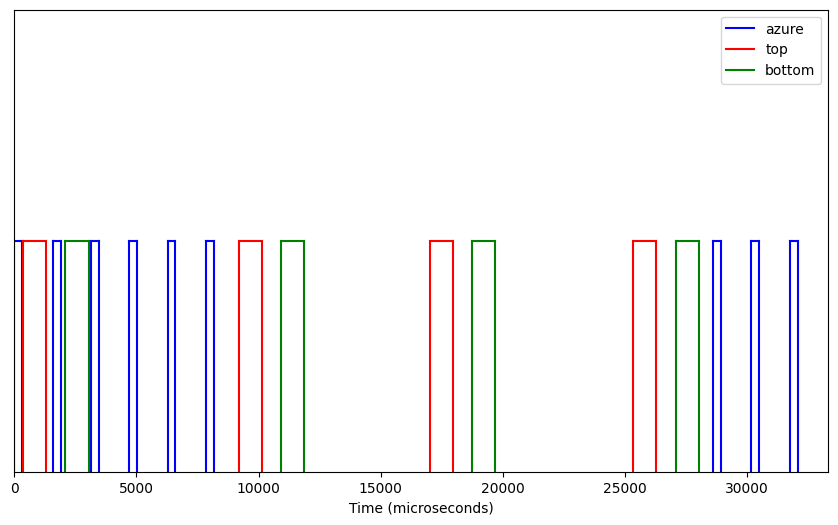

(<Figure size 1050x600 with 1 Axes>, <Axes: xlabel='Time (microseconds)'>)

In [1]:
from multicamera_acquisition.interfaces.arduino import Arduino, viz_triggers
arduino = Arduino(basename='foo')
viz_triggers(arduino.config)